## Assignment Statement

One simple test to determine whether a random number generator is giving random values from a distribution with distribution function $F(x)$ is that of Kolmogorov and Smirnov. 

Using the random number generator, obtain a sample of size $n$. 

Order the sample with $x_r$ being the $r$th smallest observation. 

Define the sample distribution function $S_n$ to be $$ S_n(x) = \begin{cases} 0 \text{ for } x < x_{(1)} \\ \frac{r}{n} \text{ for } x_{(r)} \leq x < x_{(r+1)} \\ 1 \text{ for } x_{(n)} \leq x \end{cases}$$

Then, for $n$ larger than $80$, it can be shown that if the $x$'s are truly coming from $F$, then, with probability $0.99$, $$ \text{sup}_x \vert S_n(x) - F(x) \vert < \dfrac{1.6276}{\sqrt{n}}.$$

Use the random number generator, $X_{n+1} = 7^5 X_n \text{mod}(2^{31} -1)$, to generate a sample of size $1,000$ from the uniform distribution on the unit interval.

Does your sample pass the Kolmogorov-Smirnov test?

## Assignment Minimal Requirements

### Imports

In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### Generate Data

In [226]:
# Declare the values for the random number generator.
increment = 0
multiplier = 7**5
modulus = (2**31)-1
number_of_iterations = 1000

# The seed value is not explicitly provided, so I'll start with 1.
seed_value = 1

In [227]:
# We create our starting lists
values = [seed_value]
function_values = []
uniform_values = []

In [228]:
# Generate the random number generated values.
for _ in range(number_of_iterations):
    # Calculate the next value.
    next_value = (multiplier * values[-1] + increment) % modulus
    
    # Print the value.
    # print(next_value)

    # Store the value to the list.
    values.append(next_value)

In [229]:
# We now have 1001 values, including our seed value.
# We drop the seed value, which is currently the first one in the list, leaving us with the 1,000 we wanted.
values.pop(0)

1

In [230]:
# We put the values in order
ordered_values = sorted(values)

In [231]:
# We generate the Empirical function values
for i in range(number_of_iterations):
    # Calculate the next value.
    next_value = (i+1)/number_of_iterations
    
    # Store the value to the list.
    function_values.append(next_value)

In [232]:
# I want to create an index list for the dataframe.
index_list = np.arange(1, len(ordered_values) + 1)

In [233]:
# We generate the Pseudo-Uniform values
for i in range(len(ordered_values)):
    
    # Calculate the next value.
    # We take each generated value and divide it by the interval of x_(1) through x_(n) to get our U(0,1) values.
    value = ordered_values[i]/(ordered_values[len(ordered_values)-1] - ordered_values[0])
    
    # Store the value to the list.
    uniform_values.append(value)

In [234]:
# We'll need to find the absolute value of the differences for the S and F so that we can find the supremum / max of those.
differences = [abs(s - f) for s, f in zip(function_values, uniform_values)]

In [235]:
# Check to make sure the lists are the same length before building the dataframe.
print(len(index_list))
print(len(ordered_values))
print(len(function_values))
print(len(uniform_values))
print(len(differences))

1000
1000
1000
1000
1000


In [236]:
# Create a DataFrame with the ordered values and their corresponding S_n(x) values
df = pd.DataFrame({
    'Index': index_list,
    'Ordered Values': ordered_values,
    'S': function_values,
    'F': uniform_values,
    'Difference': differences
})

In [238]:
df

,Index,Ordered Values,S,F,Difference
0,1,16807,0.001,0.000008,0.000992
1,2,1277844,0.002,0.000595,0.001405
2,3,1887638,0.003,0.000879,0.002121
3,4,3559274,0.004,0.001658,0.002342
4,5,6441594,0.005,0.003001,0.001999
...,...,...,...,...,...
995,996,2129300973,0.996,0.992079,0.003921
996,997,2137606534,0.997,0.995948,0.001052
997,998,2142326661,0.998,0.998148,0.000148
998,999,2145586676,0.999,0.999666,0.000666


### As an intermediary step, I want to plot the ordered values for $S_n(x)$ and $F(x)$ and verify that they both look geometrically similar. A uniform CDF should be shaped like a right-leaning triangle.

We plot the S values.

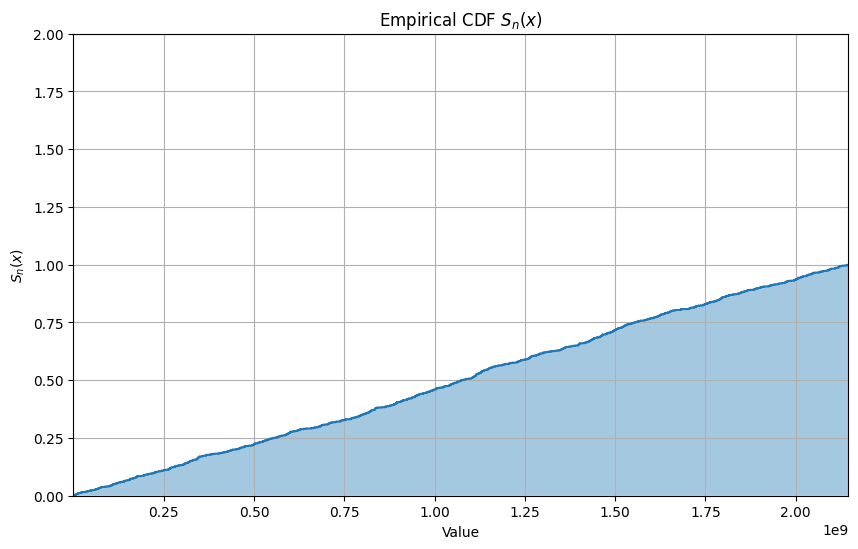

In [239]:
# Plotting the step function for S
plt.figure(figsize=(10, 6))

# We adjust the plot limits so that we make sure we can see the whole shape.
plt.xlim(df['Ordered Values'].iloc[0], df['Ordered Values'].iloc[-1])
plt.ylim(0, max(df['S']) + 1)

# We plot the step function with the space under S filled in.
plt.step(df['Ordered Values'], df['S'], where='post', label='Empirical CDF $S_n(x)$')
plt.fill_between(df['Ordered Values'], df['S'], step="post", alpha=0.4)

# We label the axes and the plot itself.
plt.xlabel('Value')
plt.ylabel('$S_n(x)$')
plt.title('Empirical CDF $S_n(x)$')
# plt.legend()
plt.grid(True)

# Display the plot
plt.show()

We plot the (ordered) F values.

In [241]:
ordered_uniform_values = sorted(uniform_values)

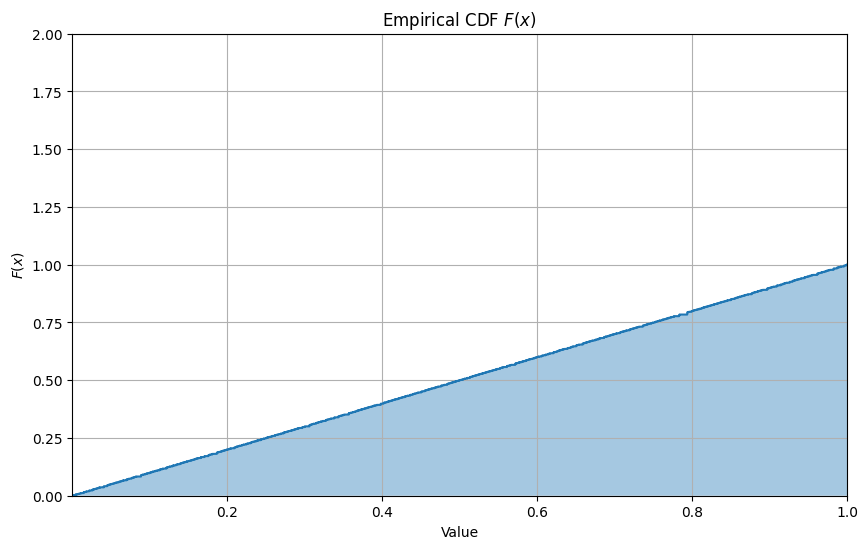

In [242]:
# Plotting the step function for S
plt.figure(figsize=(10, 6))

# We adjust the plot limits so that we make sure we can see the whole shape.
plt.xlim(ordered_uniform_values[0], ordered_uniform_values[-1])
plt.ylim(0, max(df['F']) + 1)

# We plot the step function with the space under S filled in.
plt.step(ordered_uniform_values, df['F'], where='post', label='Empirical CDF $F(x)$')
plt.fill_between(ordered_uniform_values, df['F'], step="post", alpha=0.4)

# We label the axes and the plot itself.
plt.xlabel('Value')
plt.ylabel('$F(x)$')
plt.title('Empirical CDF $F(x)$')
# plt.legend()
plt.grid(True)

# Display the plot
plt.show()

They do look roughy the same, though obviously with a different scale.

### Find if $\text{sup}_x \vert S_n(x) - F(x) \vert < \dfrac{1.6276}{\sqrt{n}}$

In [243]:
check_value = (1.6276)/number_of_iterations**(1/2)

In [246]:
supremum = max(df['Difference'])
print(supremum)

0.028544896506217055


In [247]:
print(supremum < check_value)

True


We get a value of 'True' from above, and therefore the Kolmogorov-Smirnov test indicates that there is no statistically significant difference between the two distributions.

# 2